# Variables Aleatorias Discretas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png" width="200px" height="180px" />

> Habiendo estudiado el repaso de teor√≠a de probabilidad, empezaremos por estudiar variables aleatorias discretas.


> **Objetivos:**
> - Repasar la definici√≥n de variables aleatorias discretas.
> - Repasar las variabels aleatorias de Bernoulli, binomial y geom√©tricas, y los fen√≥menos que modelan.
> - Definir la funci√≥n de masa de probabilidad y la funci√≥n de distribuci√≥n acumulada, usando tablas o f√≥rmulas.
> - Definir el valor esperado (media) de una VA discreta.


> **Referencias:**
> 
> - Pattern Recognition and Machine Learning, by Christopher M. Bishop. Cap 1.2.
> - https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2022/mit18_05_s22_probability.pdf


<p style="text-align:right;"> Imagen recuperada de: https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png.</p>

___

## 0. Recap

- Un espacio muestral discreto $\Omega$ es un conjunto finito o enumerable de resultados $\Omega = \{\omega_1, \omega_2, \dots\}$.

- La probabilidad de un resultado $\omega$ es $p(\omega)$.

- Un evento $E$ es un subconjunto de $\Omega$. La probabilidad de un evento $E$ es $p(E) = \sum_{\omega \in E} p(\omega)$.

## 1. Variables aleatorias (VA) discretas

**Definici√≥n.** Sea $\Omega$ un espacio muestral discreto. Una VA discreta es una funci√≥n

$$
X: \Omega \to \mathbb{R}.
$$


**Ejemplo.** Supongamos que jugamos con dos dados.

Al tirarlos, los resultados son:

$$
\Omega = \{(i,j): i,j=1, 2, \dots, 6\}.
$$

La funci√≥n de probabilidad, si los dados son justos, es $p(i, j) = \frac{1}{36}$.

Supongamos que estamos en un juego, donde ganamos $500 si la suma de $i$ y $j$ es 7. Caso contrario perdemos $100. Podemos definir una VA discreta con esta funci√≥n de pago:

$$
X(i,j) = \left\lbrace
\begin{array}{lc}
500  &  \text{if } i+j=7 \\ 
-100 &  \text{if } i+j\neq7
\end{array}
\right .
$$

![dice](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/2-Dice-Icon.svg/600px-2-Dice-Icon.svg.png)

**Definici√≥n.** La funci√≥n de masa de probabilidad (pmf por sus siglas en ingl√©s) de una VA discreta es la funci√≥n $p(a) = p(X=a)$.

Es f√°cil notar que:

- $0 \leq p(a) \leq 1$.
- $a$ puede ser cualquier n√∫mero. Si $a$ es un n√∫mero que $X$ nunca toma, entonces $p(a)=0$.

**Ejemplo.** Consideramos el tiro de un solo dado. El dado est√° cargado, de modo que solo salen los valores $1$, $5$ y $6$, y de modo que la funci√≥n de probabilidad sea:
$$
p(X) = \left\{\begin{array}{cc }0.3 & X=1 \\ 0.3 & X=5 \\ 0.4 & X=6\end{array}\right.
$$

In [1]:
# Importar scipy.stats
from scipy import stats

In [2]:
# Definir listas de valores de X y probabilidades asociadas
X = stats.rv_discrete(
    name='X', 
    values=([1, 2, 3, 4, 5, 6], [0.3, 0, 0, 0, 0.3, 0.4])
)

# Equivalentemente
X = stats.rv_discrete(
    name='X', 
    values=([1, 5, 6], [0.3, 0.3, 0.4])
)

In [3]:
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(-3, 10)

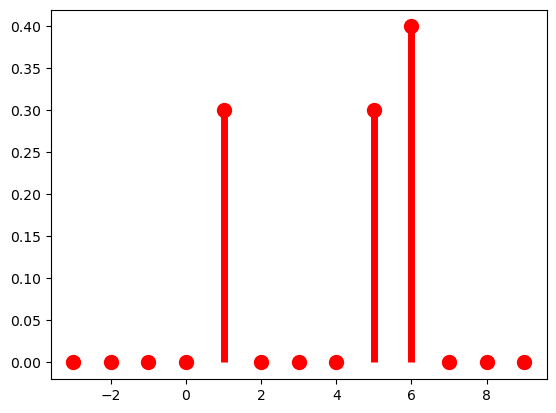

In [4]:
# Grafico
plt.plot(
    x,
    X.pmf(x),
    'or',
    ms=10
)
plt.vlines(x, 0, X.pmf(x), colors='r', lw=5)
#plt.plot(x, np.zeros(len(x)), color='r')

**Definici√≥n.** La funci√≥n de distribuci√≥n acumulada (cdf por sus siglas en ingl√©s) de una VA discreta $X$ es la funci√≥n $F$ dada por $F(a) = p(X \leq a)$.

**Ejemplo.** Considerando el ejemplo anterior, tenemos que:

|  x  |  1  |  2  |  3  |  4  |  5  |  6  |
| --- | --- | --- | --- | --- | --- | --- |
| p(x)| 0.3 |  0  |  0  |  0  | 0.3 | 0.4 |
| F(x)| 0.3 | 0.3 | 0.3 | 0.3 | 0.6 |  1  |

**Propiedades:**

- $F$ es no decreciente. Es decir, su gr√°fica nunca decrece.
- $0 \leq F(a) \leq 1$.
- $\lim_{a \to \infty} F(a) = 1$.
- $\lim_{a \to -\infty} F(a) = 0$.

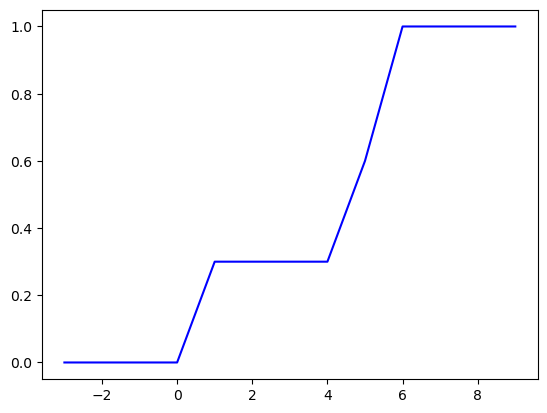

In [5]:
# Grafico
plt.plot(
    x,
    X.cdf(x),
    'b'
)

In [6]:
X.cdf(-np.inf), X.cdf(np.inf)

(0.0, 1.0)

## 2. Distribuciones espec√≠ficas

### 2.1. Distribuci√≥n de Bernoulli

La distribuci√≥n de Bernoulli modela una ejecuci√≥n de un experimento con dos posibles resultados, normalmente denominados √©xito y fracaso. Es una de las distribuciones m√°s importantes, y a la vez la m√°s simple.

Decimos que una VA $X$ sigue una distribuci√≥n de Bernoulli con par√°mtro $p$ si:

- $X$ solo puede tomar los valores $0$ y $1$.
- $p(X=1) = p$ y $p(X=0)=1-p$.

Denotamos esto como $X \sim \text{Bernoulli}(p)$.

**Ejemplos.** Con la distribuci√≥n de Bernoulli se pueden modelar los siguientes fen√≥menos.

- Tiro de una moneda. $p$ es la proporci√≥n de veces que cae cara.
- Votos a favor de una propuesta. $p$ es la proporci√≥n de votos a favor de la propuesta.
- En un clasificador binario, normalmente la salida la modelamos con una VA de Bernoulli, con par√°metro desconocido.

In [7]:
bernoulli = stats.bernoulli(p=0.3)

In [8]:
x = np.arange(-2, 5, 1)

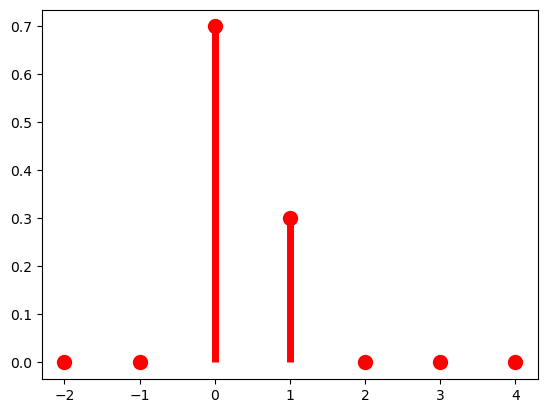

In [9]:
# Grafico
plt.plot(
    x,
    bernoulli.pmf(x),
    'or',
    ms=10
)
plt.vlines(x, 0, bernoulli.pmf(x), colors='r', lw=5)

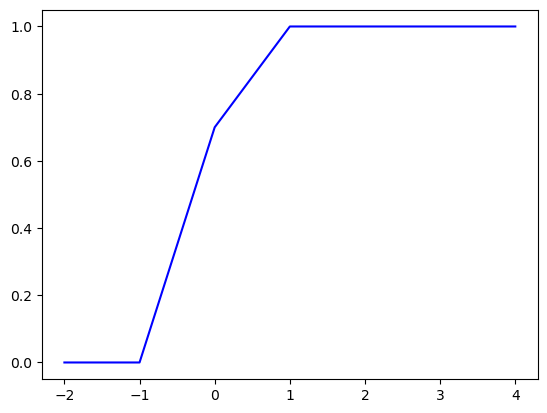

In [10]:
# Grafico
plt.plot(
    x,
    bernoulli.cdf(x),
    'b'
)

üìå **Caracter√≠sticas clave:**
- Un solo ensayo con dos resultados posibles: **√©xito** o **fracaso**.
- Se define √∫nicamente por la probabilidad de √©xito \(p\).
- Ejemplos: lanzar una moneda una vez, verificar si un producto est√° defectuoso.

**Pistas para identificarla:**
- Solo hay **un intento**.
- El resultado es dicot√≥mico (s√≠/no, √©xito/fracaso, 1/0).


### 2.2. Distribuci√≥n Binomial

La distribuci√≥n binomial, $\text{Binomial}(n, p)$, modela el n√∫mero de √©xitos en $n$ tiros independientes de un experimento $\text{Bernoulli}(p)$.

Es decir, un solo experimento de Bernoulli corresponde, por ejemplo, al tiro de una moneda. Un solo experimento Binomial consiste de $n$ experimentos de Bernoulli.

El espacio de resultados de Bernoulli es $\{0, 1\}$. El espacio de resultados de Binomial son secuencias de longitud $n$ de ceros y/o unos.

Mientras que una VA de Bernoulli puede tomar valores $0$ o $1$, una VA binomial puede tomar valores $0, 1, \dots, n$.

Denotamos esto como $X \sim \text{Binomial}(n, p)$.

La pmf de una distribuci√≥n binomial es:

$$
p(a) = \left(\begin{array}{c}n \\ a \end{array}\right) p^a (1 - p)^{n-a}
$$

Si hacemos $n=1$, $\text{Binomial}(1, p) = \text{Bernoulli}(p)$.

**Ejemplo.** Grafiquemos algunas distribuciones binomiales:

In [11]:
n = 1000
p = 0.8
binomial = stats.binom(n=n, p=p)

In [12]:
x = np.arange(-20, 1050, 1)

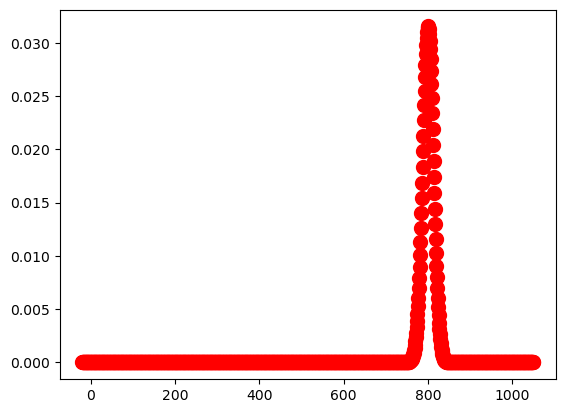

In [13]:
# Grafico
plt.plot(
    x,
    binomial.pmf(x),
    'or',
    ms=10
)
#plt.vlines(x, 0, binomial.pmf(x), colors='r', lw=5)

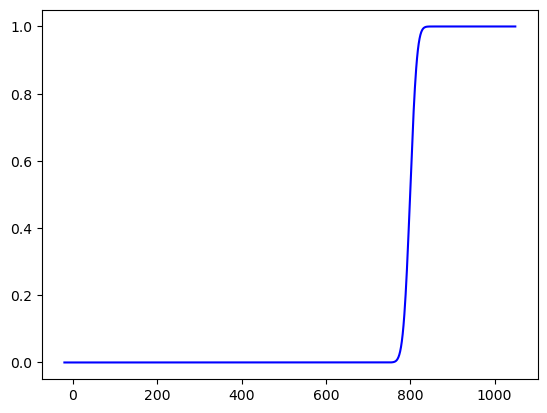

In [14]:
plt.plot(
    x,
    binomial.cdf(x),
    'b'
)

In [15]:
# Grafico


In [16]:
# Grafico


üìå **Caracter√≠sticas clave:**
- N√∫mero fijo de ensayos \(n\), independientes y con la misma probabilidad de √©xito \(p\).
- La variable es el **n√∫mero de √©xitos** obtenidos en los \(n\) ensayos.
- Ejemplos: n√∫mero de caras al lanzar una moneda 10 veces, cantidad de clientes que compran en un d√≠a.

**Pistas para identificarla:**
- Hay **varios intentos** (\(n > 1\)) y son independientes.
- Mismo valor de \(p\) en cada ensayo.
- La variable aleatoria cuenta cu√°ntos √©xitos ocurren.


### 2.3. Distribuci√≥n geom√©trica.

La distribuci√≥n geom√©trica modela el n√∫mero de fracasos antes del primer √©xito en una secuencia de experimentos de Bernoulli.

La VA $X$ sigue una distribuci√≥n geom√©trica con par√°metro $p$ si,

- $X$ toma los valores $0, 1, 2, \dots$
- Su pmf est√° dada por $p(a) = p (1 - p)^{a}$.

La denotamos como $Geom(p)$.

**Ejemplo.** Grafiquemos algunas distribuciones geom√©tricas:

In [17]:
p = 0.2
geometrica = stats.geom(p=p)

In [18]:
x = np.arange(-2, 30, 1)

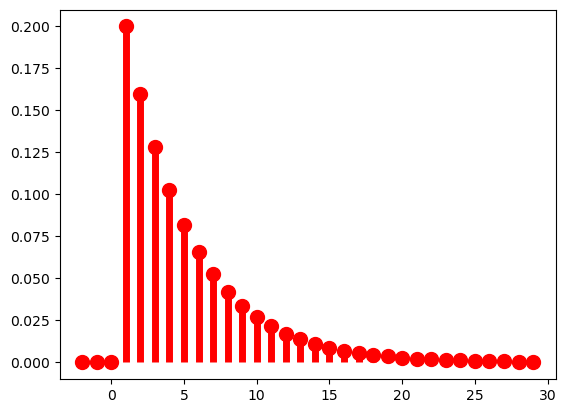

In [19]:
# Grafico
plt.plot(
    x,
    geometrica.pmf(x),
    'or',
    ms=10
)
plt.vlines(x, 0, geometrica.pmf(x), colors='r', lw=5)

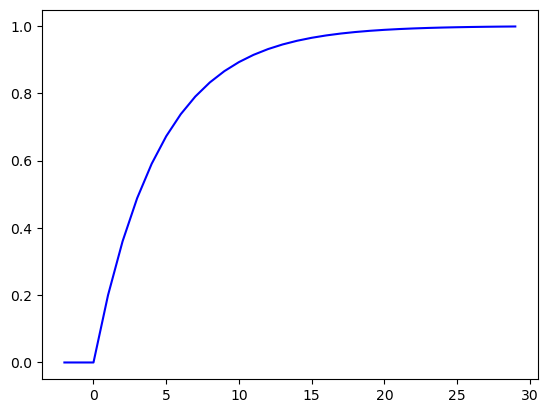

In [20]:
# Grafico
plt.plot(
    x,
    geometrica.cdf(x),
    'b'
)

üìå **Caracter√≠sticas clave:**
- Modela el n√∫mero de ensayos **hasta el primer √©xito**.
- Probabilidad de √©xito constante \(p\).
- Ejemplos: cantidad de tiros libres necesarios hasta encestar, llamadas hasta contactar a un cliente.

**Pistas para identificarla:**
- Se cuentan los intentos hasta que ocurra un √©xito por primera vez.
- No se fija un n√∫mero de ensayos de antemano.


### Ejemplo:

Lee cada situaci√≥n y determina:
1. Qu√© distribuci√≥n es la m√°s apropiada (Bernoulli, Binomial o Geom√©trica).
2. Cu√°les son sus par√°metros (\( p \), \( n \) si aplica).
3. Explica tu razonamiento.

---

#### Ejercicio 1
En un control de calidad, un chip electr√≥nico puede estar defectuoso o no. La probabilidad de que sea defectuoso es 0.015.

---

#### Ejercicio 2
Un call center logra contactar al cliente que necesita en cada llamada con probabilidad 0.3. Se mide el n√∫mero de llamadas necesarias hasta hablar con el cliente correcto.

---

#### Ejercicio 3
En una encuesta, el 73.4% de los encuestados est√°n a favor de la propuesta de semana laboral de 4 d√≠as. Se elige una persona al azar y se observa si est√° a favor.

---

#### Ejercicio 4
La probabilidad de que un usuario haga clic en un anuncio en l√≠nea es 0.08. Se muestran 100 anuncios a distintos usuarios y se cuenta el total de clics.

---

#### Ejercicio 5
En un juego de basketball, la probabilidad de encestar un tiro libre es 0.75. Se mide el n√∫mero de intentos hasta encestar por primera vez.

---

#### Ejercicio 6
El 2% de las botellas producidas presenta una falla en el sellado. Se inspeccionan 50 botellas seleccionadas aleatoriamente y se cuenta cu√°ntas fallan.

---

**Espacio para respuestas:**

| Ejercicio | Distribuci√≥n | Par√°metros    | Justificaci√≥n breve |
|-----------|--------------|---------------|---------------------|
| 1         | Bernoulli    | p=0.015       |                     |
| 2         | Geom√©trica   | p=0.3         |                     |
| 3         | Bernoulli    | p=0.734       |                     |
| 4         | Binomial     | n=100; p=0.08 |                     |
| 5         | Geom√©trica   | p=0.75        |                     |
| 6         | Binomial     | n=50; p=0.02  |                     |

## üîç Diagrama de decisi√≥n r√°pido

      ¬øSolo un ensayo?
            ‚îú‚îÄ‚îÄ S√≠ ‚Üí Bernoulli
            ‚îî‚îÄ‚îÄ No
      ¬øSe fija n y se cuentan √©xitos en n ensayos?
            ‚îú‚îÄ‚îÄ S√≠ ‚Üí Binomial
            ‚îî‚îÄ‚îÄ No
      ¬øSe cuentan intentos hasta el primer √©xito?
            ‚îú‚îÄ‚îÄ S√≠ ‚Üí Geom√©trica
            ‚îî‚îÄ‚îÄ Requiere otro modelo

# 3. Valor esperado y varianza.

**Ejemplo.** Suponga que tiene un dado justo con cinco 3's y un 6. ¬øCu√°l esperar√≠a que fuera el promedio de 6000 tiros?

> Tablero.

**Ejemplo.** Se tiran dos dados de seis caras. Si ganas $1000 si la suma es 2, y pierdes $100 de otro modo, ¬øCu√°nto esperas ganar en promedio por tiro?

> Tablero.

Una de las operaciones m√°s importantes con probabilidades es la de encontrar promedios ponderados de funciones. El **valor esperado** de una funci√≥n $f(x)$ respecto a una distribuci√≥n $p(x)$, denotado por $\mathbb{E}_p[f]$, est√° dado por:

- Para una distribuci√≥n discreta:
  
  $$
  \mathbb{E}_p[f] = \sum_x p(x)f(x).
  $$

Si queremos evaluar el Valor Esperado de la variable aleatoria como tal, tenemos que:

$$
\mathbb{E}_p[X] = \sum_x p(x)x.
$$

**Ejemplos.** Simular los promedios anteriores de forma num√©rica, y contrastarlos con el valor esperado.

In [ ]:
# Primer caso
X = stats.rv_discrete(
    values=([3, 6], [5 / 6, 1 / 6])
)
# Valor esperado te√≥rico
valor_esperado_teorico = X.expect()  # 3 * 5 / 6 + 6 * 1 / 6
valor_esperado_teorico

3.5

In [30]:
n_muestras = 10000

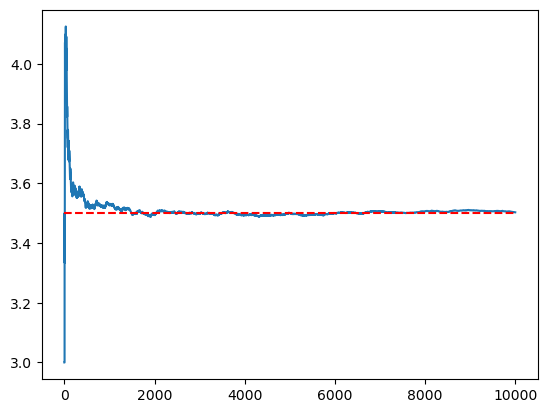

In [31]:
# Muestreamos la variable aleatoria
muestras = X.rvs(size=n_muestras)
# Obtenemos el promedio a medida que vamos obteniendo m√°s muestras
promedio_sucesivo = muestras.cumsum() / np.arange(1, n_muestras + 1)
# Graficamos
plt.plot(promedio_sucesivo)
plt.hlines(valor_esperado_teorico, 0, n_muestras, colors='r', linestyles='dashed')

In [23]:
# Segundo caso

# Valor esperado te√≥rico


In [24]:
# Muestreamos la variable aleatoria

# Obtenemos el promedio a medida que vamos obteniendo m√°s muestras

# Graficamos


El valor esperado es una *medida de tendencia central*, en el sentido que nos da un valor hacia el cual tiende a agruparse los datos. Una medida de la variabilidad al rededor del valor esperado es **la varianza**, denotada por $\mathrm{var}_p[f]$, que est√° definida por:

$$
\mathrm{var}_p[f] = \mathbb{E}_p[(f(x) - \mathbb{E}_p[f])^2] = \mathbb{E}_p[f(x)^2] - \mathbb{E}_p[f]^2.
$$

In [32]:
# Varianza en el primer caso (X toma valores entre 3 y 6 // Valor esperado es 3.5)
X.var()

1.25

In [33]:
Y = stats.rv_discrete(
    values=([1000, -100], [1 / 36, 35 / 36])
)
Y.expect()

-69.44444444444444

In [34]:
# Varianza en el segundo caso (Y toma valores entre -100 y 1000 // Valor esperado es -69.44)
Y.var()

32677.46913580247

Si queremos una medida que nos de un sentido de dispersi√≥n en las "mismas unidades" de la variable aleatoria, podemos acudir a la desviaci√≥n est√°ndar, que se define como:

$$
\text{std}_p[f] = \sqrt{\text{var}_p[f]}
$$

In [35]:
# Desviaci√≥n est√°ndar en el primer caso (X toma valores entre 3 y 6 // Valor esperado es 3.5)
X.std()

1.118033988749895

In [36]:
# Desviaci√≥n est√°ndar en el segundo caso (Y toma valores entre -100 y 1000 // Valor esperado es -69.44)
Y.std()

180.76910448359936

# Anuncios parroquiales

### 1. Revisar la siguiente [app](https://mathlets.org/mathlets/probability-distributions/).
### 2. Ya pueden hacer el ejercicio 4 de la tarea.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jim√©nez Rodr√≠guez.
</footer>